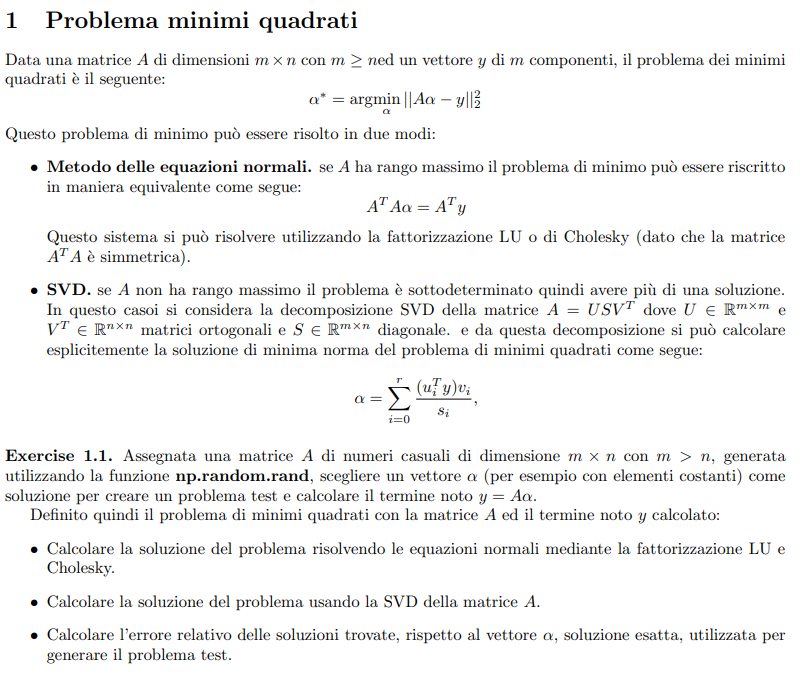

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import lu_factor as LUdec

# Exercise 1

m = 100
n = 50

A = np.random.rand(m,n)

alpha_test = np.ones(n)*5
y = A@alpha_test

print('alpha test', alpha_test)

ATA = A.T@A
ATy = A.T@y

lu, piv = LUdec(ATA)
alpha_LU = scipy.linalg.lu_solve((lu,piv), ATy)

print('alpha LU', alpha_LU)
print('ER: ', np.linalg.norm(alpha_test-alpha_LU)/np.linalg.norm(alpha_test))

L = scipy.linalg.cholesky(ATA)
x = scipy.linalg.solve_triangular(np.transpose(L), ATy, lower=True)
alpha_chol = scipy.linalg.solve_triangular(L, x, lower=False)

print('alpha chol', alpha_chol)
print('ER: ', np.linalg.norm(alpha_test-alpha_chol)/np.linalg.norm(alpha_test))

U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = np.zeros(s.shape)

for i in range(n):
  ui = U[:, i]
  vi = Vh[i, :]

  alpha_svd += (np.dot(ui,y) * vi) / s[i]

print('alpha SVD', alpha_svd)
print('ER: ', np.linalg.norm(alpha_test-alpha_svd)/np.linalg.norm(alpha_test))

alpha test [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5.]
alpha LU [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5.]
ER:  3.955919162474076e-14
alpha chol [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5.]
ER:  9.714167152859836e-14
Shape of U: (100, 100)
Shape of s: (50,)
Shape of V: (50, 50)
alpha SVD [5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5.]
ER:  7.677150391149088e-15


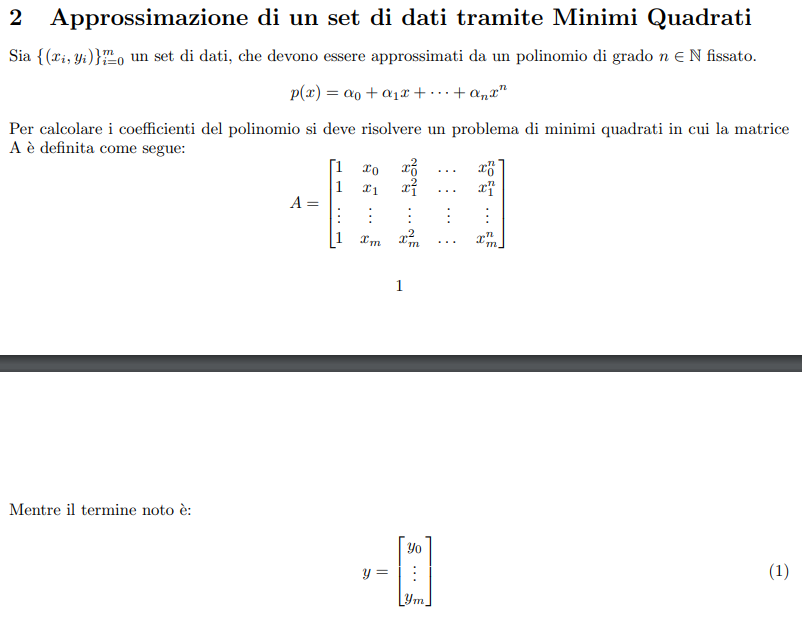

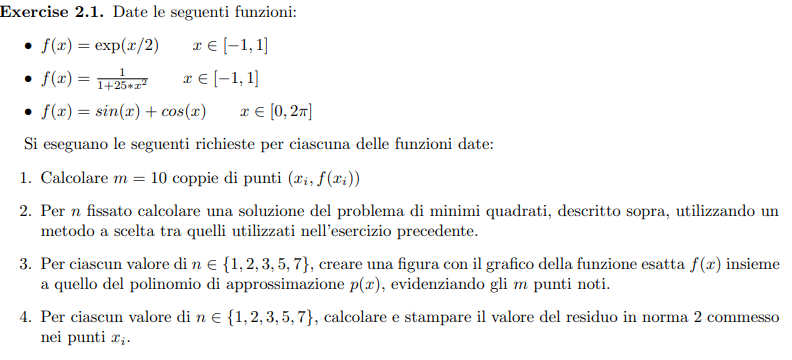

In [ ]:
# Exercise 2
def interpolate(case):
  m = 10
  m_plot = 100

  # Grado polinomio approssimante
  for n in [1,2,3,5,7]:

    if case==0:
        x = np.linspace(-1,1,m)
        y = np.exp(x/2)
    elif case==1:
        x = np.linspace(-1,1,m)
        y = 1/(1+25*(x**2))
    elif case==2:
        x = np.linspace(0,2*np.pi,m)
        y = np.sin(x)+np.cos(x)


    A = np.zeros((m,n+1))

    for i in range(n+1):
      A[:, i] = x**i

    U, s, Vh = scipy.linalg.svd(A)

    alpha_svd = np.zeros(n+1)

    for i in range(n+1):
      ui = U[:, i]
      vi = Vh[i, :]

      alpha_svd += (np.dot(ui,y) * vi) / s[i]

    # x dati, x_plot dati da approx
    x_plot = np.linspace(x[0], x[-1], m_plot)
    A_plot = np.zeros((m_plot, n+1))

    for i in range(n+1):
      A_plot[:, i] = x_plot**i

    y_interpolation = A_plot @ alpha_svd

    px = A@alpha_svd
    res = np.linalg.norm(px - y,2)
    print('Residual SVD: ', res)

    plt.plot(x, y, 'o')
    plt.plot(x_plot, y_interpolation, 'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolazione polinomiale di grado {n}')
    plt.grid()
    plt.show()

Valore alpha:  [1.05169894 0.51523297]


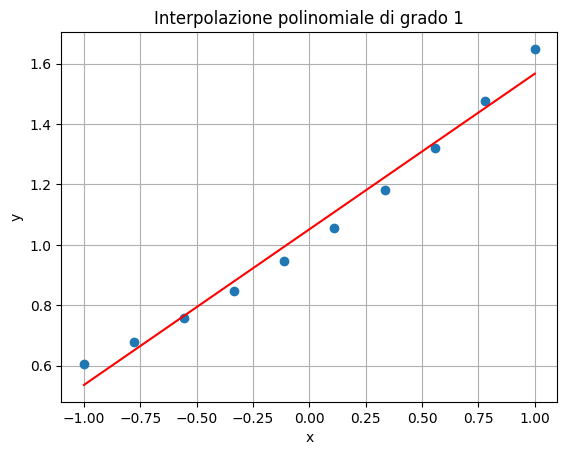

Residual:  0.145433382884694
Valore alpha:  [0.99969023 0.51523297 0.12765775]


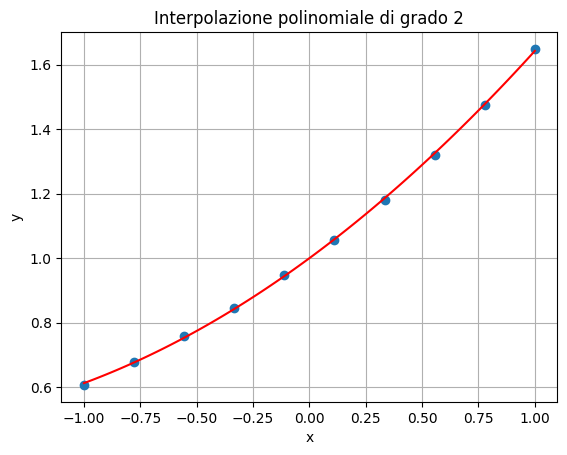

Residual:  0.012936563157837878
Valore alpha:  [0.99969023 0.49991905 0.12765775 0.0211677 ]


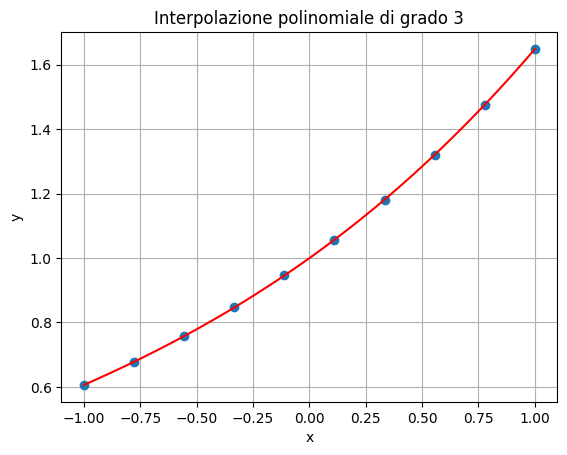

Residual:  0.0008263727821353013
Valore alpha:  [1.00000060e+00 5.00000139e-01 1.24988092e-01 2.08320882e-02
 2.63709877e-03 2.63076547e-04]


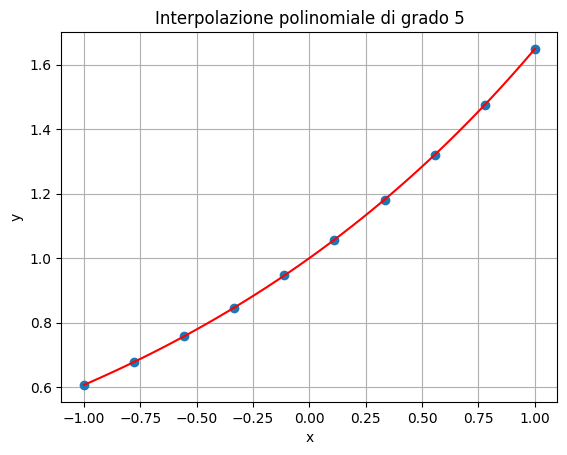

Residual:  1.477729918707959e-06
Valore alpha:  [1.00000000e+00 5.00000000e-01 1.25000017e-01 2.08333348e-02
 2.60406567e-03 2.60410030e-04 2.18828985e-05 1.56077952e-06]


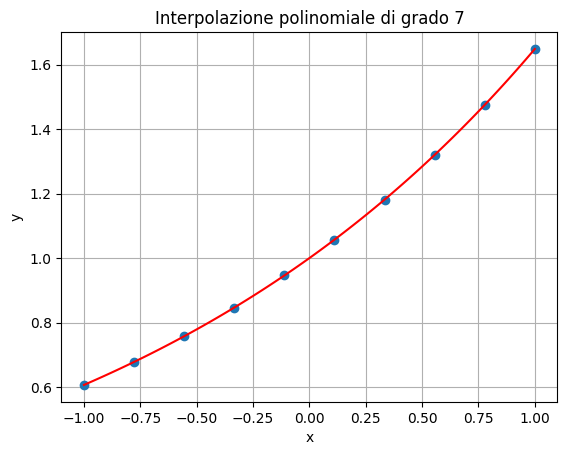

Residual:  8.737821526123543e-10


In [ ]:
interpolate(0)

Valore alpha:  [2.48814136e-01 8.59440460e-17]


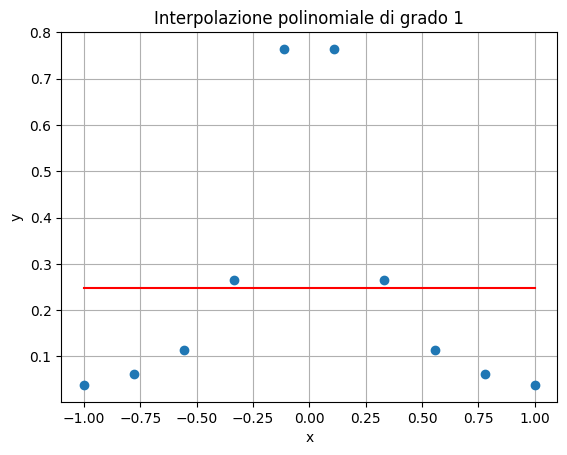

Residual:  0.8519889898800778
Valore alpha:  [ 4.74479148e-01  1.23087429e-16 -5.53905029e-01]


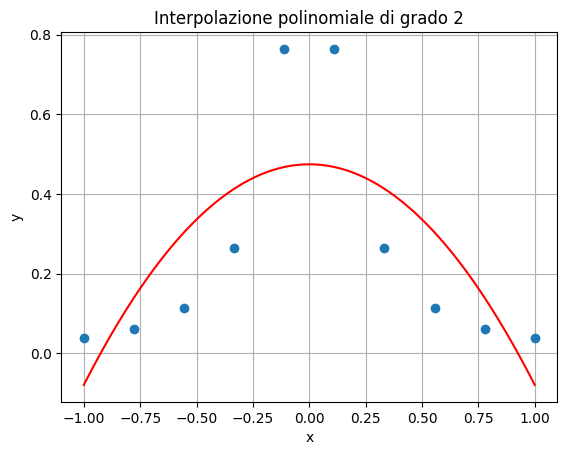

Residual:  0.5751808755886042
Valore alpha:  [ 4.74479148e-01 -1.61631194e-16 -5.53905029e-01  4.48358990e-16]


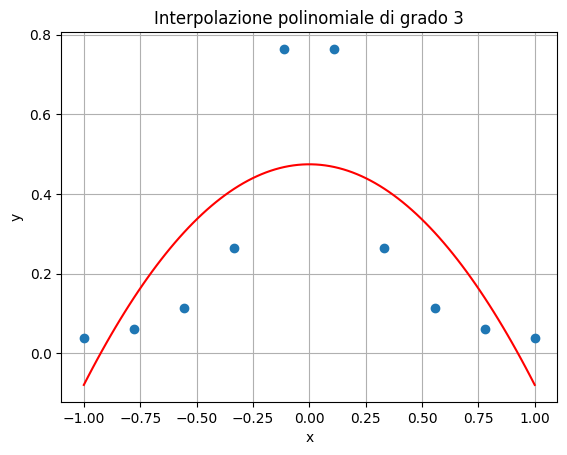

Residual:  0.5751808755886041
Valore alpha:  [ 6.42191979e-01  1.44617678e-16 -1.99646993e+00 -1.89573840e-15
  1.42497265e+00  1.91286346e-15]


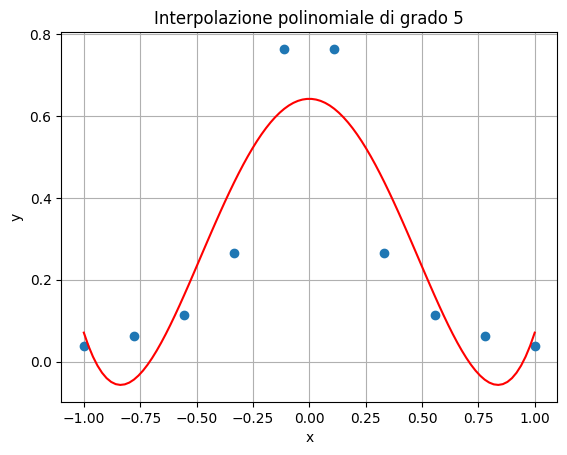

Residual:  0.3631838354754461
Valore alpha:  [ 7.67384095e-01  3.43649734e-14 -4.47552598e+00  3.57914182e-14
  8.29218923e+00 -9.36430145e-16 -4.54921187e+00  4.71019911e-14]


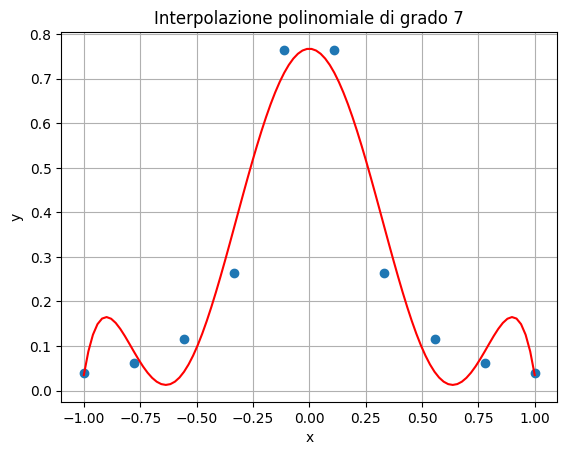

Residual:  0.1939183846601575


In [ ]:
interpolate(1)

Valore alpha:  [ 0.77438082 -0.21466208]


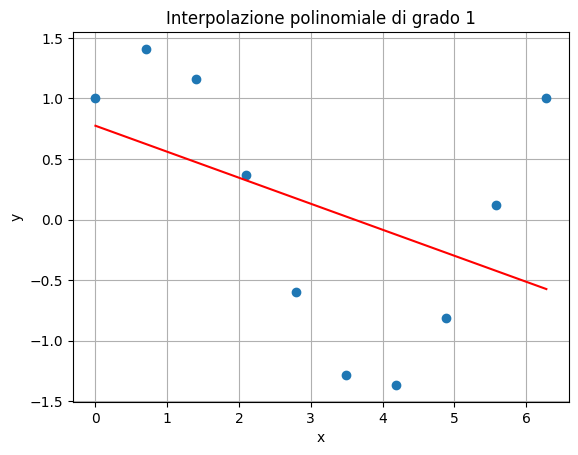

Residual:  2.8367505921049365
Valore alpha:  [ 1.92140002 -1.44690007  0.19611677]


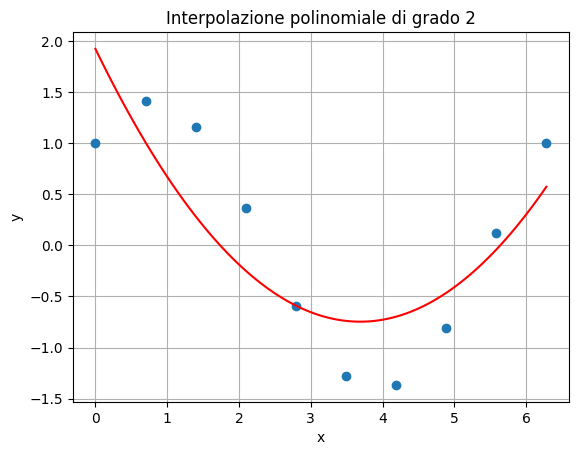

Residual:  1.7952974022498318
Valore alpha:  [ 1.19282899  0.46222741 -0.60469494  0.08496876]


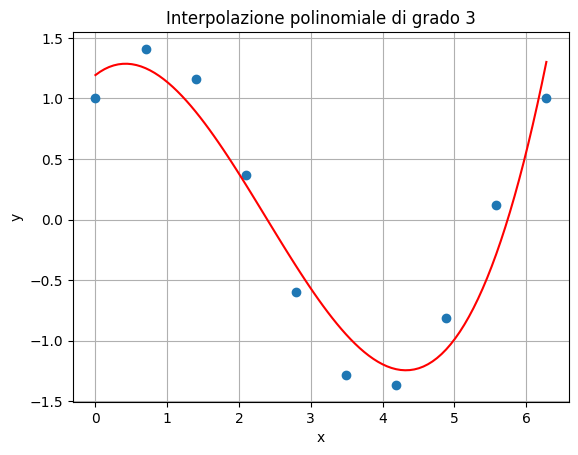

Residual:  0.80077077177318
Valore alpha:  [ 0.99315181  1.18619381 -0.77082962 -0.07787167  0.06176099 -0.00551072]


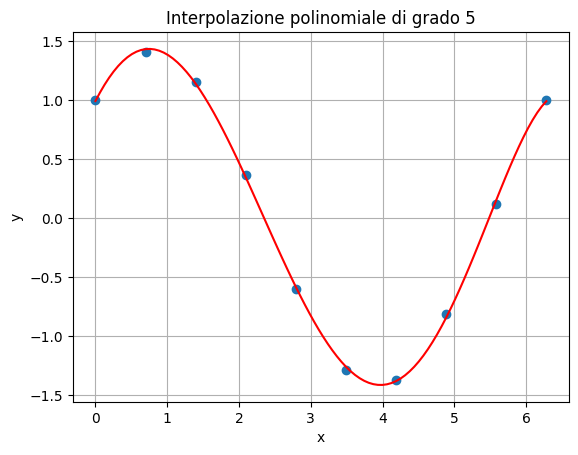

Residual:  0.06559431617548454
Valore alpha:  [ 1.00003083e+00  9.77531789e-01 -4.34564755e-01 -2.32885792e-01
  7.02987169e-02  4.47279780e-03 -2.32165017e-03  1.50714072e-04]


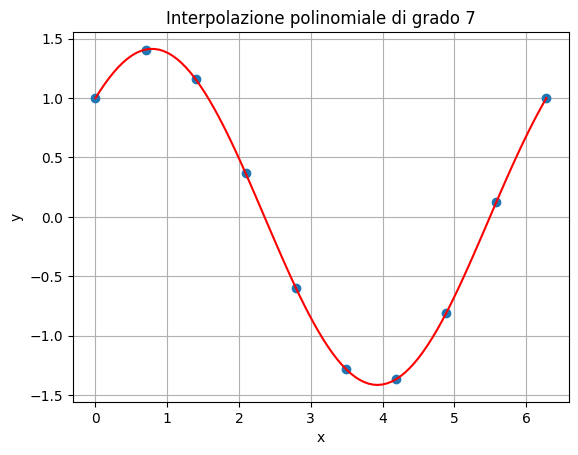

Residual:  0.0016911098620954945


In [ ]:
interpolate(2)

In [ ]:
# Exercise 2
def interpolate_C(case):
  m = 10
  m_plot = 100

  # Grado polinomio approssimante
  for n in [1,2,3,5,7]:

    if case==0:
        x = np.linspace(-1,1,m)
        y = np.exp(x/2)
    elif case==1:
        x = np.linspace(-1,1,m)
        y = 1/(1+25*(x**2))
    elif case==2:
        x = np.linspace(0,2*np.pi,m)
        y = np.sin(x)+np.cos(x)


    A = np.zeros((m,n+1))

    for i in range(n+1):
      A[:, i] = x**i

    L = scipy.linalg.cholesky(A.T@A)
    y_c = scipy.linalg.solve(L.T, A.T@y)
    alpha_c = scipy.linalg.solve(L, y_c)

    # x dati, x_plot dati da approx
    x_plot = np.linspace(x[0], x[-1], m_plot)
    A_plot = np.zeros((m_plot, n+1))

    for i in range(n+1):
      A_plot[:, i] = x_plot**i

    y_interpolation = A_plot @ alpha_c

    px = A@alpha_c
    res = np.linalg.norm(px - y,2)
    print('Residual Cholesky: ', res)

    plt.plot(x, y, 'o')
    plt.plot(x_plot, y_interpolation, 'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolazione polinomiale di grado {n}')
    plt.grid()
    plt.show()

Residual Cholesky:  0.145433382884694


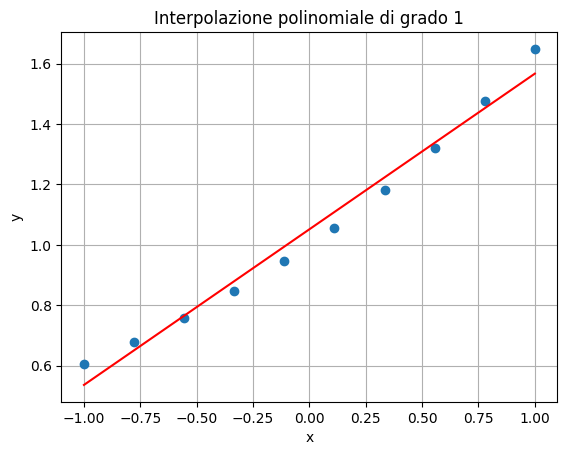

Residual Cholesky:  0.012936563157837776


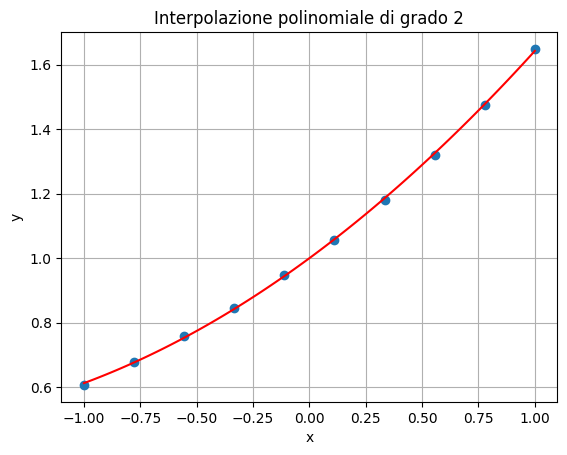

Residual Cholesky:  0.0008263727821353131


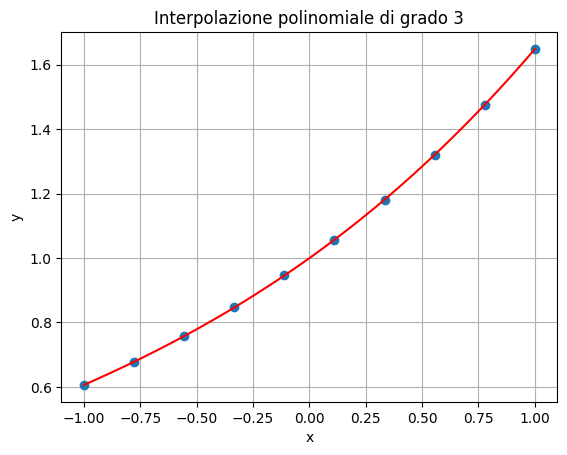

Residual Cholesky:  1.4777299185327216e-06


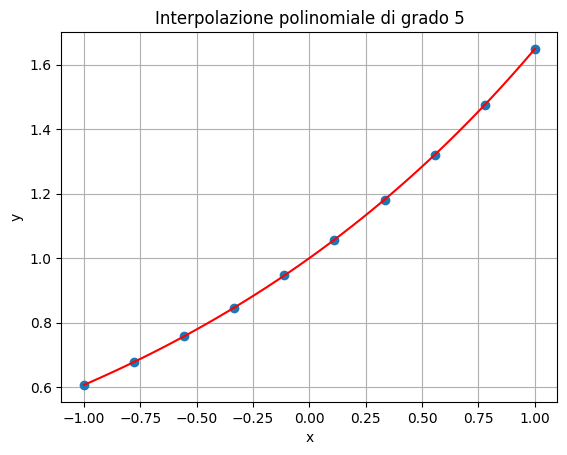

Residual Cholesky:  8.737823716648029e-10


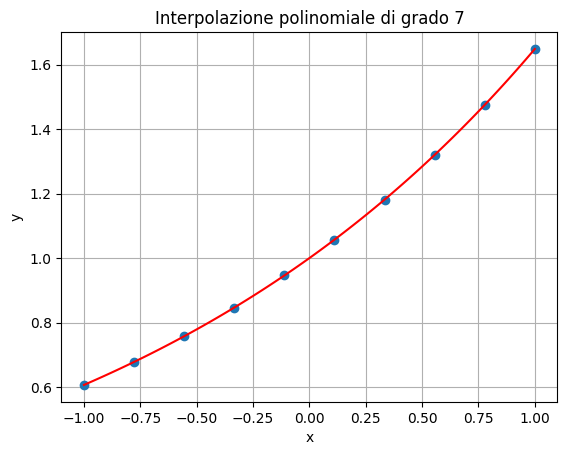

In [ ]:
interpolate_C(0)

Residual Cholesky:  0.8519889898800777


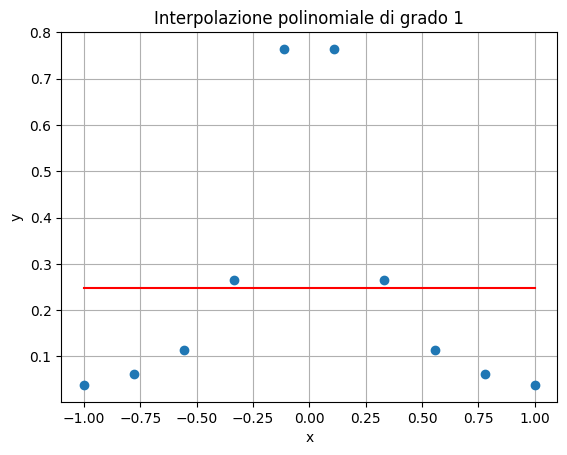

Residual Cholesky:  0.5751808755886042


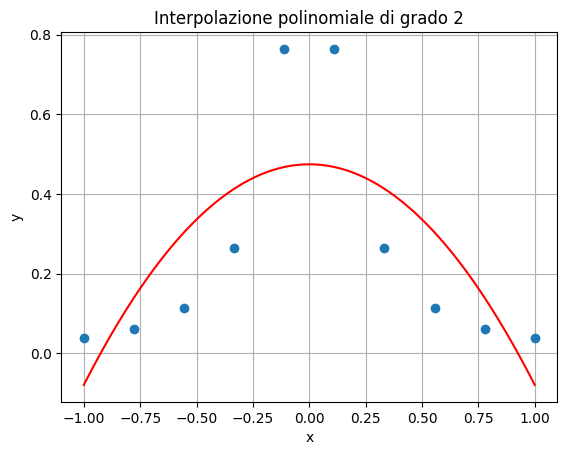

Residual Cholesky:  0.5751808755886042


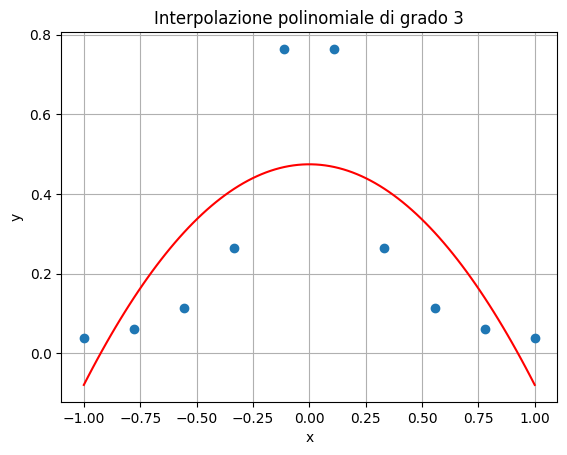

Residual Cholesky:  0.3631838354754461


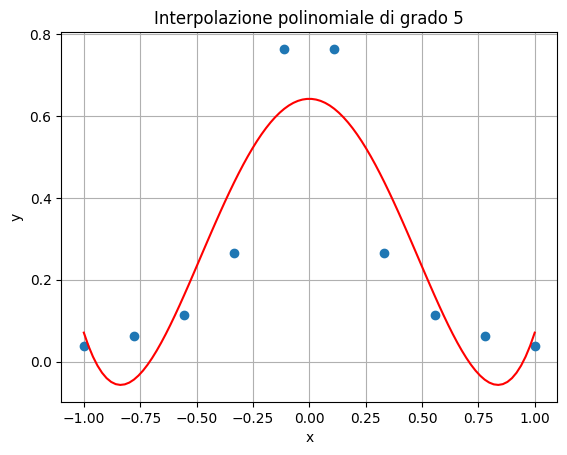

Residual Cholesky:  0.1939183846601575


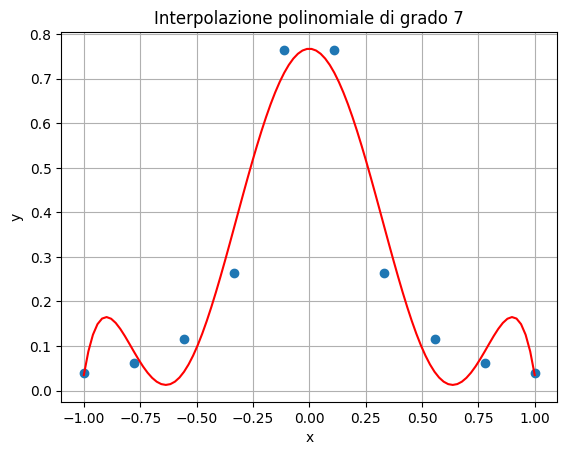

In [ ]:
interpolate_C(1)

Residual Cholesky:  2.836750592104937


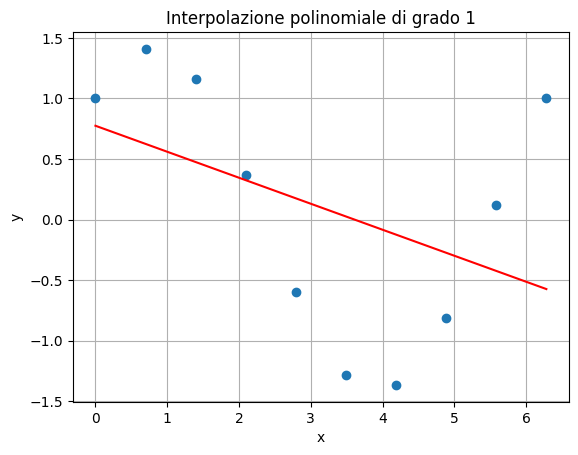

Residual Cholesky:  1.7952974022498323


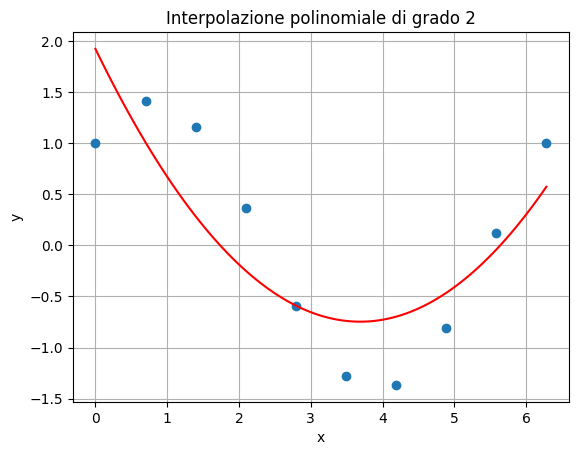

Residual Cholesky:  0.8007707717731808


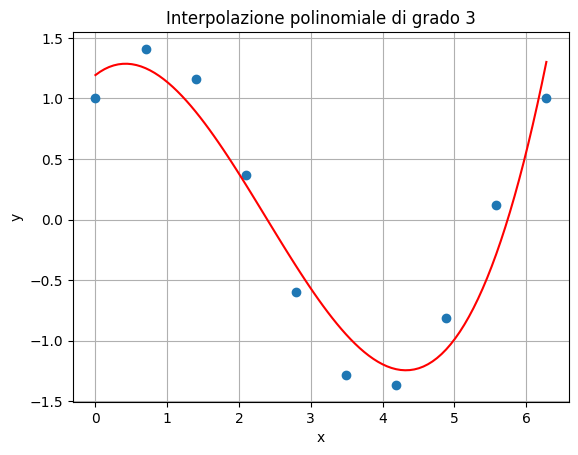

Residual Cholesky:  0.06559431617548482


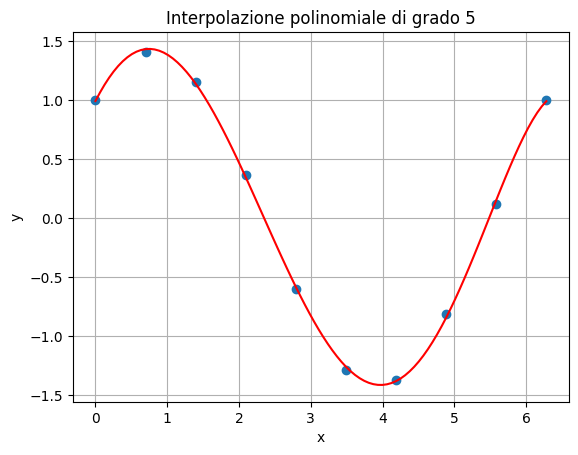

Residual Cholesky:  0.0016911098620969798


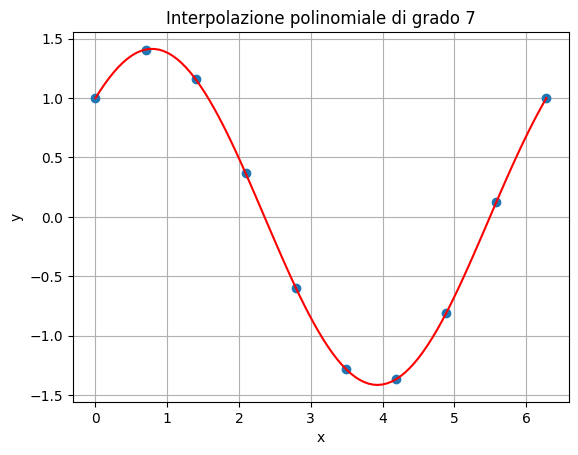

In [ ]:
interpolate_C(2)